# AULA 3 - Prática 1: Introdução à Otimização para Redes Neurais

Aula 3 - Aula Assíncrona
https://www.youtube.com/watch?time_continue=9&v=xkO_72hW7WY&ab_channel=MoacirAntonelliPonti

---

## Otimização para Redes Neurais

- Implementando um modelo de perceptron com Pytorch para regressão
    - Regressão
    - Forward pass
    - Treinamento com backpropagation/gradient descent

---

In [102]:
import torch
import numpy as np
import matplotlib.pyplot as plt

- Modelo da aula anterior -> completar com o que faltava para um Perceptron
    - Treinamento do perceptron basicamente

* Utilizamos o gradient descent normal primeiramente, sem aproveitar todo o batch ou parte dele

In [103]:
class Perceptron():

    def __init__(self, num_inputs, learning_rate = 0.01):
        self.w = torch.normal(0, 1, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
        self.num_inputs = num_inputs # num de entradas
        self.lr = learning_rate # taxa de aprendizado

    def act_relu(self, x):
        a = torch.zeros_like(x)
        return torch.max(x, a)
    
    def forward(self, X):
        # X w + b
        linear = X @ self.w + self.b # multiplicação e soma matricial
        return self.act_relu(linear)

    def squared_loss(self, y, y_hat):
        yr = y.reshape(y_hat.shape) # check extra de que o shape de y é igual ao de y_hat
        l = (y_hat - yr)**2/2
        return l.mean()

    def backward(self, X, y):
        y_hat = self.forward(X) # forward pass
        errors = (y.reshape(y_hat.shape) - y_hat) # diferenciação
        return errors

    def train_step(self, X, y):
        for i in range(y.shape[0]): # roda o dataset
            error = self.backward(X[i].reshape(1, self.num_inputs), y[i].reshape(-1))
            # gradient descent
            self.w = self.w + self.lr*(error * X[i]).reshape(self.num_inputs, 1)
            self.b = self.b + self.lr*error

In [104]:
model = Perceptron(3, learning_rate=0.002)
model.w, model.b, model.lr

(tensor([[ 0.9478],
         [-0.7758],
         [ 0.5696]], requires_grad=True),
 tensor([0.], requires_grad=True),
 0.002)

- A ideia é: sabemos o y desejado e queremos que a partir de x e do erro, o perceptron ajustes o peso e o bias para chegar na saída desejada
    - x é uma matriz 10x3 enquanto y é 1x10, ou seja, é como se cada linha de x representasse uma posição de y através de alguma aritmética que a rede vai encontrar

In [105]:
# X: 3 dimensões por instancia
X = torch.arange(30,  dtype = torch.float32).reshape((10,3)) + torch.normal(0, 2, (10,3)) 
print(X)
y =  torch.arange(10,  dtype = torch.float32)
# x: Entrada da rede, y: saída correta
print(y)

tensor([[-4.4694, -2.6038,  4.1264],
        [ 2.2524,  0.5306,  3.9465],
        [ 6.7656,  8.4451,  7.0767],
        [ 5.0728, 10.3501,  9.4288],
        [10.2649, 15.6277,  7.7340],
        [14.9715, 13.2423, 15.8457],
        [16.4849, 18.1789, 20.2831],
        [18.2188, 19.9427, 21.6505],
        [25.0372, 24.9094, 25.1342],
        [27.6152, 25.6189, 28.1870]])
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


* Abaixo, nós usamos o passo pra frente pra a partir dos valores de inicialização, tentar chegar em y
    * Como dá pra ver, o erro foi grande, o que já era esperado para o primeiro passo pra frente
    * O erro quadrático já sinaliza isso com valores muito maiores que 0

In [106]:
try1 = model.forward(X)
try1, y, model.squared_loss(y, try1) 

(tensor([[ 0.1343],
         [ 3.9708],
         [ 3.8910],
         [ 2.1483],
         [ 2.0096],
         [12.9410],
         [13.0729],
         [14.1267],
         [18.7198],
         [22.3515]], grad_fn=<MaximumBackward0>),
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor(23.7079, grad_fn=<MeanBackward0>))

* "Epocas são o números de vezes que o algoritmo vai ver o conjunto de treinamento completo"

In [107]:
epochs = 100
loss_plot = list()
for e in range(epochs):
    model.train_step(X,y)
    loss = model.squared_loss(y, model.forward(X)).item()
    loss_plot.append(loss)
    if e % 20 == 0:
        print(f'Epoch: {e}')
        print('Parameters: ', model.w.detach().numpy(), model.b.item())
        print(f'Squared Loss: {loss:.6f}')
        

Epoch: 0
Parameters:  [[-0.31693888]
 [-1.8618505 ]
 [-0.7420051 ]] -0.05481663718819618
Squared Loss: 14.745392
Epoch: 20
Parameters:  [[0.27355638]
 [0.00753434]
 [0.14953747]] 0.09389518201351166
Squared Loss: 1.349724
Epoch: 40
Parameters:  [[0.2615251 ]
 [0.03008369]
 [0.17788818]] 0.03309568390250206
Squared Loss: 2.452612
Epoch: 60
Parameters:  [[0.25372082]
 [0.032742  ]
 [0.19122887]] -0.03277013823390007
Squared Loss: 2.651399
Epoch: 80
Parameters:  [[0.24926224]
 [0.0344393 ]
 [0.20059755]] -0.09882882237434387
Squared Loss: 2.790566


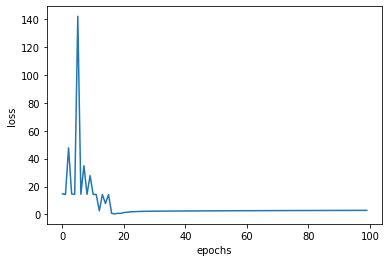

(tensor([[ 0.0000],
         [ 1.2331],
         [ 3.2778],
         [ 3.4174],
         [ 4.5328],
         [ 7.2932],
         [ 8.7642],
         [ 9.5385],
         [12.1196],
         [13.4146]], grad_fn=<MaximumBackward0>),
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [108]:
plt.plot(range(epochs), loss_plot)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

model.forward(X), y

### Teste (pós treinamento)

In [109]:
X_t = torch.arange(15, dtype=torch.float32).reshape((5,3)) + torch.normal(0, 3, (5,3))
print(X_t)
y_t = torch.arange(5, dtype=torch.float32)
print(y_t)

tensor([[ 0.7447,  1.1290,  3.8822],
        [ 3.8534,  5.5280,  6.1053],
        [ 4.4604, 10.8040,  6.2836],
        [ 7.9795,  7.6624,  5.9323],
        [13.6535, 12.0843,  9.1533]])
tensor([0., 1., 2., 3., 4.])


In [110]:
model.forward(X_t),  y_t, model.squared_loss(y_t, model.forward(X_t))

(tensor([[0.8696],
         [2.2544],
         [2.6291],
         [3.3112],
         [5.5364]], grad_fn=<MaximumBackward0>),
 tensor([0., 1., 2., 3., 4.]),
 tensor(0.5183, grad_fn=<MeanBackward0>))